In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [5]:
feb = [409, 2177, 2584, 8173, -3.84, 2.17]
mar = [972, 9052, 3060, 14237, -4.19, -0.92]
apr = [2182, 6538, 3461, 9432, -3.46, 0.30]
may = [1125, 4053, 2305, 5957, -2.93, 0.017]
jun = [1019,3900,2977,9761,-3.90,-0.31]
jul = [1156, 3893, 4064, 10232, -2.98, 1.72]
aug = [513, 1208, 1466, 2843, -2.63,0.916]
sep = [1092, 3488, 4405, 13473,-4.08,0.33]
ocb = [2000,5000,4500,9000,-3.51,0.11]
nov = [2500,6000,4500,9000,-2.92,-0.54]
dec = [694, 2427, 3743, 9247,-2.40,0.869]
jan = [516, 2571,1547,5602,-3.5,1.25]

data = [feb, mar, apr, may, jun, jul, aug, sep, ocb, nov, dec, jan]

In [6]:
months = [datetime.datetime.strptime("01-02-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-03-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-04-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-05-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-06-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-07-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-08-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-09-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-10-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-11-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-12-2020", "%d-%m-%Y"), datetime.datetime.strptime("01-01-2021", "%d-%m-%Y")]
labels = ["COVID Events", "COVID Articles", "All Events", "All Articles", "Mean Tone", "Mean GoldStein Score"]

In [7]:
df = pd.DataFrame(data, index = months, columns = labels)

In [8]:
df_2 = pd.read_csv("/Users/Armand/Downloads/time_series_covid19_deaths_global.txt", sep=",")
df_2 = df_2[df_2["Country/Region"]=="France"]
df_2 = df_2.append(df_2.sum(), ignore_index=True).T
df_2 = df_2.drop(["Province/State", "Country/Region", "Lat", "Long"]).drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11], axis=1)
df_2.index = pd.to_datetime(df_2.index, format='%m/%d/%y', errors='ignore')
df_2 = df_2["2020-02-02":"2021-02-20"]
df_2[12] = df_2[12].astype(int)
for i in range(1 ,len(df_2)):
    df_2.iloc[-i] = df_2.iloc[-i] - df_2.iloc[-i-1]
df_2 = df_2.rolling(8).mean()
df_2 = df_2.rename(columns={12:"Daily Deaths"})

In [9]:
percent = pd.DataFrame()
percent["Events"] = df.iloc[:,0]/df.iloc[:,2]
percent["Articles"] = df.iloc[:,1]/df.iloc[:,3]

Text(0, 0.5, 'Daily Deaths')

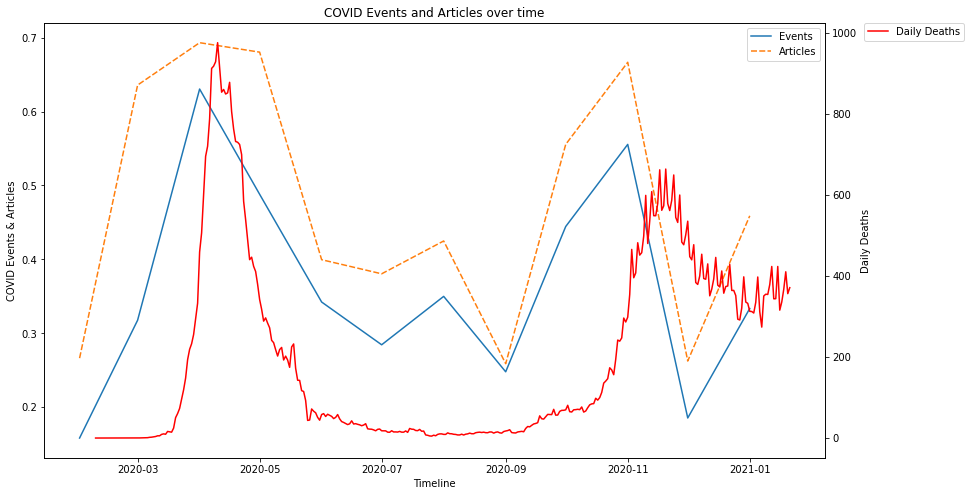

In [10]:
plt.figure(figsize=(14,8))
sns.lineplot(data=percent)
plt.xlabel("Timeline")
plt.ylabel("COVID Events & Articles")
plt.ylabel("COVID Events & Articles")
plt.title("COVID Events and Articles over time")

ax2 = plt.twinx()
sns.lineplot(data=df_2, palette=['red'], ax=ax2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Daily Deaths")



In [11]:
scores = pd.DataFrame()
scores["Tone"] = df.iloc[:,-2]
scores["GS"] = df.iloc[:,-1]

Text(0, 0.5, 'Daily Deaths')

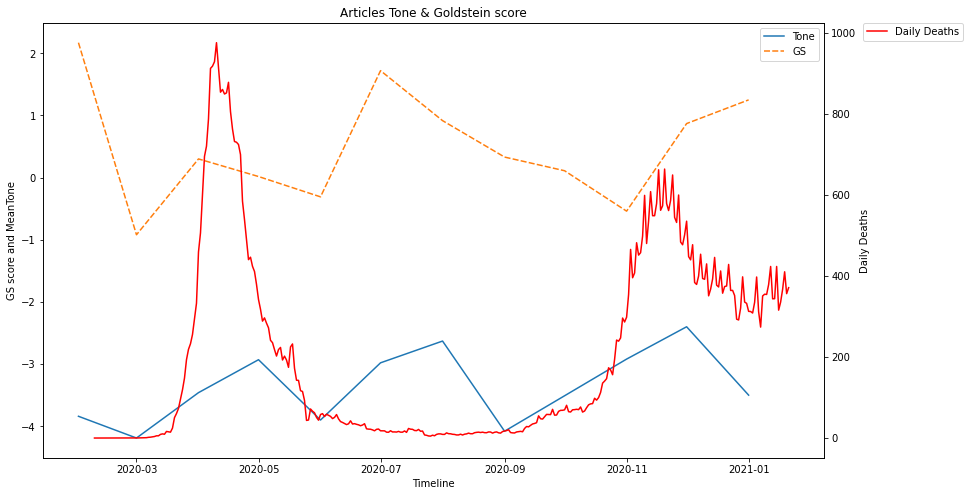

In [12]:
plt.figure(figsize=(14,8))
sns.lineplot(data=scores)
plt.xlabel("Timeline")
plt.ylabel("GS score and MeanTone")
plt.title("Articles Tone & Goldstein score")

ax2 = plt.twinx()
sns.lineplot(data=df_2, palette=['red'], ax=ax2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Daily Deaths")